**Prediction of Wine Quality based on its Manufacturing Ingredients**

## 1. Data Importing and Initial Exploration

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,auc,average_precision_score,classification_report,roc_auc_score,log_loss,roc_curve, precision_recall_curve,auc,average_precision_score
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
df =  pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/data/wine_quality_pre.csv',sep = ",")
df.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


**Study of Correlations between Feature and Target Variable**

From the pair plots and the calculation of correlation, we see the following relations between the feature and target variables.

1.   The feature variables affecting the outcome of wine quality the most are volatile acidity, chlorides, density and alcohol.
2.   Alcohol shows a strong positive correlation while the other variables represent strong negative correlations.
3. Fixed Acidity, Residual Sugar, and Total Sulfur Dioxide have weak negative correlation with wine quality. 
4. Citric Acid, Free Sulfur Dioxide, pH and Sulphates have significantly weak positive correlation with the quality of wine. 




In [4]:
#computing summary statistics for each column of the dataframe
df.describe()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,3255.125793,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505,0.196658
std,1869.906597,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286,0.397502
min,0.000000,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1639.500000,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000,0.000000
50%,3257.000000,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,4872.500000,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,0.000000
max,6496.000000,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


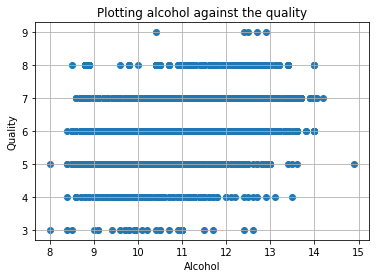

In [5]:
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()
#There is a weak positive relationship betweeen wine quality and alcohol content. Wines with high alcohol content are mostly high in quality

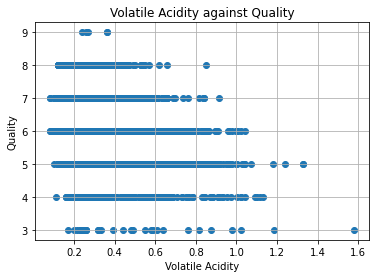

In [6]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()
#There is a negative relationship between volatile acidity and quality

In [7]:
df.corr()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
Unnamed: 0,1.000000,-0.746106,0.247893,0.489076,-0.221944,-0.256960,0.356856,-0.356260,-0.596102,0.172559,0.191148,0.359231,0.112185,-0.064193,-0.068638
type,-0.746106,1.000000,-0.488552,-0.653374,0.185892,0.349358,-0.512705,0.472653,0.700521,-0.391437,-0.328474,-0.486715,0.035095,0.119185,0.086964
fixed acidity,0.247893,-0.488552,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174,-0.049347
volatile acidity,0.489076,-0.653374,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677,-0.151756
citric acid,-0.221944,0.185892,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926,0.053870
residual sugar,-0.256960,0.349358,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654,-0.062492
chlorides,0.356856,-0.512705,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553,-0.161593
free sulfur dioxide,-0.356260,0.472653,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924,0.014821
total sulfur dioxide,-0.596102,0.700521,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598,-0.051459
density,0.172559,-0.391437,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447,-0.274404


## 2. Data Split and Preparation For Linear Regression

In [8]:
X = df[['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
y = df['quality']

# Split into Train (80%) and Test (20%) Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Split the training data into Development (80%) and Validation (20%) Datasets
X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

In [9]:
y_dev.value_counts()

6    1814
5    1358
7     686
4     135
8     121
3      19
9       3
Name: quality, dtype: int64

**PreProcessing**

In [10]:
scaler = MinMaxScaler()
# Reconstructing the dataset
feature_names=['type', 'fixed acidity',
               'volatile acidity','citric acid',
               'residual sugar','chlorides',
               'free sulfur dioxide', 'total sulfur dioxide',
               'density','pH',
               'sulphates','alcohol']
preprocess = make_column_transformer((StandardScaler(),feature_names))

## Model Building and Evaluation

### 1. Linear Regression

In [11]:
scalerMethod = StandardScaler().fit(X_dev)
X_dev = scalerMethod.transform(X_dev)
X_test = scalerMethod.transform(X_test)
X_val = scalerMethod.transform(X_val)

In [12]:
#Creating the linear regression model and fitting the data to it
regressor=LinearRegression()
regressor.fit(X_dev,y_dev)
y_prediction_dev=regressor.predict(X_dev)
y_prediction_val=regressor.predict(X_val)
y_prediction_test=regressor.predict(X_test)

In [13]:
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%regressor.score(X_test,y_test))

Coefficients: 
 [-0.16113435  0.1019041  -0.25062365 -0.01816997  0.30128976 -0.03817047
  0.07499674 -0.05690527 -0.29698666  0.07086468  0.10985997  0.25909074]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.34512650409498813


MSE obtained from Linear Regression is 0.52. Now we will check the MSE baseline from taking an average of the quality, to check how well the model did.

In [14]:
baseline_mean=y_dev.mean(axis=0)
print("MSE Baseline: Dev",(np.square(([baseline_mean]*y_dev.shape[0]) - y_dev)).mean(axis=0))
print("MSE Baseline: Val",(np.square(([baseline_mean]*y_val.shape[0]) - y_val)).mean(axis=0))
print("MSE Baseline: Test",(np.square(([baseline_mean]*y_test.shape[0]) - y_test)).mean(axis=0))

MSE Baseline: Dev 0.7569447302358336
MSE Baseline: Val 0.7473455697765432
MSE Baseline: Test 0.792444482023038


Since the MSE has reduced with the model, we can conclude that it performs better than baseline.

We will now add cross validation to this method.

In [15]:
from sklearn.model_selection import cross_val_score
regressor2=LinearRegression()
#Computing score using 5 fold cross validation method. cv is used to determine the folds ie 5
scores=cross_val_score(regressor2,X,y,cv=5)
print(scores.mean())
print(scores)

0.26037662338970957
[0.21278101 0.26220749 0.30696016 0.2340613  0.28587316]


We now train a model with Lasso Regression.

In [16]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [ 0.         -0.         -0.128905    0.          0.         -0.
  0.          0.         -0.          0.          0.          0.26333723]
Mean squared error Dev: 0.59
Mean squared error Val: 0.58
Mean squared error Test: 0.58
R-score is 0.2723028761630918


We now train a model with Ridge Regression.

In [17]:
from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [-0.16024206  0.10104314 -0.25054121 -0.01814446  0.29969723 -0.03824354
  0.07509682 -0.05709621 -0.29467882  0.0703503   0.10971797  0.25994016]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.34510621736442115


We now train an elastic net model with cross validation.

In [18]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5,random_state=42)
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [-0.1413063   0.07794818 -0.24855002 -0.01591119  0.26136386 -0.03834496
  0.07411228 -0.05753589 -0.23912561  0.0567514   0.10511547  0.28132065]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.3442887707277895


Now, we visualize the weights of each feature from the Elastic net model.

<BarContainer object of 12 artists>

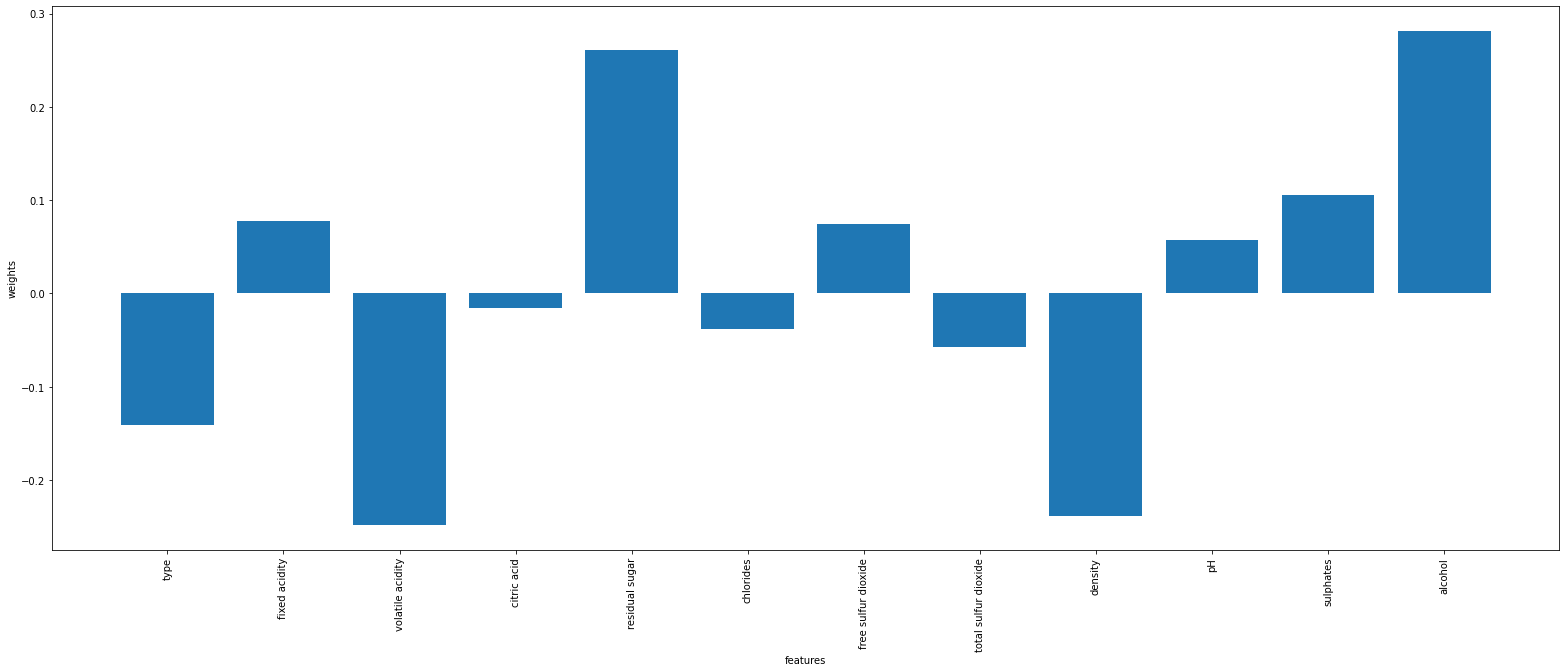

In [19]:
plt.figure(figsize=(27,10))
plt.xlabel('features')
plt.ylabel('weights')
plt.xticks(rotation = 90)
plt.bar(['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol'],reg.coef_)